In [1]:
import os.path
import glob
import datetime
import pandas as pd

In [2]:
os.path.abspath(".")

'/Users/xzhao17/Documents/GitHub/xcj_hypothesis_test_cfd/source_code/Python'

In [3]:
class OutputText:
    breaker = "---------------------------\n"
    def __init__(self, filepath):
        self.filepath = filepath

    def clear(self, *objs):
        msg = "\t".join([str(obj) for obj in objs])
        with open(self.filepath, 'w', encoding="utf-8") as fout:
            fout.write(f"{msg}\n{self.breaker}")
        print(msg)
    
    def write(self, *objs):
        msg = "\t".join([str(obj) for obj in objs])
        with open(self.filepath, 'a', encoding="utf-8") as fout:
            fout.write(f"{msg}\n{self.breaker}")
        print(msg)
            

## W

In [4]:
MIN_TWEETS = 33
FREQUENCY = '1D'

In [5]:
otxt = OutputText(f"log_f{FREQUENCY}_mt{MIN_TWEETS}.txt")
otxt.clear(f"FREQUENCY = {FREQUENCY}, MIN_TWEETS = {MIN_TWEETS}")

def showdf(df, head = True, msg=None):
    if msg is not None:
        otxt.write(msg)
    if head:
        otxt.write(df.head().to_string())
    else:
        otxt.write(df.to_string())
    otxt.write("Shape:", df.shape)

FREQUENCY = 1D, MIN_TWEETS = 33


In [6]:
wdf = pd.concat([ pd.read_csv(f, skiprows=5, parse_dates=["Date"], usecols=["Author","Sentiment","Date","Url","Title"]) for f in glob.glob("../../data/data_for_w/*.csv*")])
wdf.dropna(subset=["Author","Date","Sentiment"], inplace=True)
wdf.drop_duplicates("Url", inplace=True)
# wdf.drop(columns=["Url"], inplace=True)
wdf["Title"] = wdf["Title"].apply(lambda x: x.lower())
showdf(wdf)
wdf 

                 Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Title                                                             Url Sentiment          Author
0 2023-08-20 03:59:37                                                                                                                                                 

,Date,Title,Url,Sentiment,Author
0,2023-08-20 03:59:37,new sizes added ⚡: nike air more uptempo (ps) ...,http://twitter.com/HypeDropsApp/statuses/16931...,neutral,HypeDropsApp
1,2023-08-20 03:59:37,rt @sneakerscouts #sneakerscouts the nike wome...,http://twitter.com/SneakerScouts/statuses/1693...,neutral,SneakerScouts
2,2023-08-20 03:56:04,rt @sneakerscouts #sneakerscouts the nike air ...,http://twitter.com/SneakerScouts/statuses/1693...,neutral,SneakerScouts
3,2023-08-20 03:55:00,steal: nearly 50% off the nike solo swoosh sho...,http://twitter.com/SneakerShouts/statuses/1693...,neutral,SneakerShouts
4,2023-08-20 03:54:37,rt @pryzmrulezz @michaeldoge420 @memesus77 @mi...,http://twitter.com/Michaeldoge420/statuses/169...,neutral,Michaeldoge420
...,...,...,...,...,...
85462,2023-08-20 04:02:47,nike sb dunk low aqua noise orange emerald ris...,http://twitter.com/djdelz/statuses/16931113090...,neutral,djdelz
85463,2023-08-20 04:01:50,@fityeth @undefeatedinc @nike blue,http://twitter.com/franalations23/statuses/169...,neutral,franalations23
85464,2023-08-20 04:01:21,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HDRestocks/statuses/1693110...,neutral,HDRestocks
85465,2023-08-20 04:00:15,rt @justfreshkicks ad: nike air max 1 prm 'cre...,http://twitter.com/iyhke/statuses/169311067307...,neutral,iyhke


In [7]:
otxt.write("Unique Authors:", wdf["Author"].nunique())

Unique Authors:	568


In [8]:
otxt.write("Min:", wdf["Date"].min())
otxt.write("Max:", wdf["Date"].max())
otxt.write("Time Range:", wdf["Date"].max() - wdf["Date"].min())

Min:	2023-06-01 04:00:01
Max:	2023-09-24 03:54:56
Time Range:	114 days 23:54:55


In [9]:
wdf["mcdonalds"] = wdf["Title"].apply(lambda x: "mcdonald" in x)
wdf["starbucks"] = wdf["Title"].apply(lambda x: "starbuck" in x)
wdf["nike"] = wdf["Title"].apply(lambda x: "nike" in x)
showdf(wdf)
wdf

                 Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Title                                                             Url Sentiment          Author  mcdonalds  starbucks  nike
0 2023-08-20 03:59:37                                                                                                                     

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike
0,2023-08-20 03:59:37,new sizes added ⚡: nike air more uptempo (ps) ...,http://twitter.com/HypeDropsApp/statuses/16931...,neutral,HypeDropsApp,False,False,True
1,2023-08-20 03:59:37,rt @sneakerscouts #sneakerscouts the nike wome...,http://twitter.com/SneakerScouts/statuses/1693...,neutral,SneakerScouts,False,False,True
2,2023-08-20 03:56:04,rt @sneakerscouts #sneakerscouts the nike air ...,http://twitter.com/SneakerScouts/statuses/1693...,neutral,SneakerScouts,False,False,True
3,2023-08-20 03:55:00,steal: nearly 50% off the nike solo swoosh sho...,http://twitter.com/SneakerShouts/statuses/1693...,neutral,SneakerShouts,False,False,True
4,2023-08-20 03:54:37,rt @pryzmrulezz @michaeldoge420 @memesus77 @mi...,http://twitter.com/Michaeldoge420/statuses/169...,neutral,Michaeldoge420,False,False,True
...,...,...,...,...,...,...,...,...
85462,2023-08-20 04:02:47,nike sb dunk low aqua noise orange emerald ris...,http://twitter.com/djdelz/statuses/16931113090...,neutral,djdelz,False,False,True
85463,2023-08-20 04:01:50,@fityeth @undefeatedinc @nike blue,http://twitter.com/franalations23/statuses/169...,neutral,franalations23,False,False,True
85464,2023-08-20 04:01:21,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HDRestocks/statuses/1693110...,neutral,HDRestocks,False,False,True
85465,2023-08-20 04:00:15,rt @justfreshkicks ad: nike air max 1 prm 'cre...,http://twitter.com/iyhke/statuses/169311067307...,neutral,iyhke,False,False,True


In [10]:
wdf.drop(wdf[~wdf["mcdonalds"] & ~wdf["starbucks"] & ~wdf["nike"]].index, inplace=True)
showdf(wdf)
wdf

                 Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Title                                                             Url Sentiment          Author  mcdonalds  starbucks  nike
0 2023-08-20 03:59:37                                                                                                                     

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike
0,2023-08-20 03:59:37,new sizes added ⚡: nike air more uptempo (ps) ...,http://twitter.com/HypeDropsApp/statuses/16931...,neutral,HypeDropsApp,False,False,True
1,2023-08-20 03:59:37,rt @sneakerscouts #sneakerscouts the nike wome...,http://twitter.com/SneakerScouts/statuses/1693...,neutral,SneakerScouts,False,False,True
2,2023-08-20 03:56:04,rt @sneakerscouts #sneakerscouts the nike air ...,http://twitter.com/SneakerScouts/statuses/1693...,neutral,SneakerScouts,False,False,True
3,2023-08-20 03:55:00,steal: nearly 50% off the nike solo swoosh sho...,http://twitter.com/SneakerShouts/statuses/1693...,neutral,SneakerShouts,False,False,True
4,2023-08-20 03:54:37,rt @pryzmrulezz @michaeldoge420 @memesus77 @mi...,http://twitter.com/Michaeldoge420/statuses/169...,neutral,Michaeldoge420,False,False,True
...,...,...,...,...,...,...,...,...
85461,2023-08-20 04:04:37,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HypeDropsApp/statuses/16931...,neutral,HypeDropsApp,False,False,True
85462,2023-08-20 04:02:47,nike sb dunk low aqua noise orange emerald ris...,http://twitter.com/djdelz/statuses/16931113090...,neutral,djdelz,False,False,True
85463,2023-08-20 04:01:50,@fityeth @undefeatedinc @nike blue,http://twitter.com/franalations23/statuses/169...,neutral,franalations23,False,False,True
85464,2023-08-20 04:01:21,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HDRestocks/statuses/1693110...,neutral,HDRestocks,False,False,True


In [11]:
author_mcd = wdf[["Author", "mcdonalds"]].groupby("Author").apply(lambda gwdf: gwdf["mcdonalds"].sum()).rename("mcdonalds_count").reset_index()
author_stb = wdf[["Author", "starbucks"]].groupby("Author").apply(lambda gwdf: gwdf["starbucks"].sum()).rename("starbucks_count").reset_index()
author_nke = wdf[["Author", "nike"]].groupby("Author").apply(lambda gwdf: gwdf["nike"].sum()).rename("nike_count").reset_index()

In [12]:
author_brand = author_mcd.merge(author_stb, how="outer", on="Author", validate="one_to_one").merge(author_nke, how="outer", on="Author", validate="one_to_one").set_index("Author")
author_brand["counts_sum"] = author_brand.sum(axis=1)
author_brand["max_type"] = author_brand[["mcdonalds_count","starbucks_count","nike_count"]].idxmax(axis=1).apply(lambda x: x[:-6])
# author_brand["mcdonalds_count"] /= author_brand["counts_sum"]
# author_brand["starbucks_count"] /= author_brand["counts_sum"]
# author_brand["nike_count"] /= author_brand["counts_sum"]
author_brand = author_brand[author_brand["counts_sum"] > MIN_TWEETS]
showdf(author_brand)
author_brand

               mcdonalds_count  starbucks_count  nike_count  counts_sum   max_type
Author                                                                            
100Ebay                      0                1         307         308       nike
1560gl                       0              100           0         100  starbucks
19Edwin2                     0                0         104         104       nike
1Mauricewood                 3                2         259         264       nike
1blackafrican                0                0         407         407       nike
Shape:	(501, 5)


,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,
100Ebay,0,1,307,308,nike
1560gl,0,100,0,100,starbucks
19Edwin2,0,0,104,104,nike
1Mauricewood,3,2,259,264,nike
1blackafrican,0,0,407,407,nike
...,...,...,...,...,...
xalilulah,0,0,98,98,nike
xx_somm,0,0,114,114,nike
y0_stephhh,0,1,144,145,nike


In [13]:
_ = author_brand[(author_brand["nike_count"] != 0) & (author_brand["starbucks_count"] == author_brand["nike_count"])]
showdf(_, False, "Equal starbucks and nike:")
_

Equal starbucks and nike:
Empty DataFrame
Columns: [mcdonalds_count, starbucks_count, nike_count, counts_sum, max_type]
Index: []
Shape:	(0, 5)


,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,


In [14]:
_ = author_brand[(author_brand["mcdonalds_count"] != 0) & (author_brand["nike_count"] == author_brand["mcdonalds_count"])]
showdf(_, False, "Equal nike and mcdonalds:")
_

Equal nike and mcdonalds:
Empty DataFrame
Columns: [mcdonalds_count, starbucks_count, nike_count, counts_sum, max_type]
Index: []
Shape:	(0, 5)


,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,


In [15]:
_ = author_brand[(author_brand["mcdonalds_count"] != 0) & (author_brand["starbucks_count"] == author_brand["mcdonalds_count"])]
showdf(_, False, "Equal starbucks and mcdonalds:")
_

Equal starbucks and mcdonalds:
                 mcdonalds_count  starbucks_count  nike_count  counts_sum max_type
Author                                                                            
AllDayBuckets23                1                1        1264        1266     nike
CarlBancoro                    1                1          83          85     nike
D_defiler                      1                1          91          93     nike
Miketracy8                     2                2         797         801     nike
NacnudKevin                    1                1         295         297     nike
ScottyDeals                    1                1         928         930     nike
ShaunRajah3                    2                2        1339        1343     nike
SherylW87045                   1                1        2381        2383     nike
Stunna_Vell                    1                1         185         187     nike
TYNASTY89                      1                1       

,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,
AllDayBuckets23,1,1,1264,1266,nike
CarlBancoro,1,1,83,85,nike
D_defiler,1,1,91,93,nike
Miketracy8,2,2,797,801,nike
NacnudKevin,1,1,295,297,nike
ScottyDeals,1,1,928,930,nike
ShaunRajah3,2,2,1339,1343,nike
SherylW87045,1,1,2381,2383,nike
Stunna_Vell,1,1,185,187,nike


In [16]:
_ = wdf[~wdf["mcdonalds"] & ~wdf["starbucks"] & ~wdf["nike"]]
showdf(_, False, "Rows with False for all three mcdonalds, starbucks, and nike:")
_

Rows with False for all three mcdonalds, starbucks, and nike:
Empty DataFrame
Columns: [Date, Title, Url, Sentiment, Author, mcdonalds, starbucks, nike]
Index: []
Shape:	(0, 8)


,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike


In [17]:
author_to_brand = author_brand['max_type'].to_dict()

In [18]:
# drop tweets by all other users
wdf.drop(wdf[~wdf["Author"].isin(author_to_brand)].index, inplace=True)

In [19]:
wdf["AuthorBrand"] = wdf["Author"].apply(lambda x: author_to_brand[x])
showdf(wdf, msg="Non brand authors removed:")
wdf

Non brand authors removed:
                 Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Title                                                             Url Sentiment          Author  mcdonalds  starbucks  nike AuthorBrand
0 2023-08-20 03:59:37                                                                              

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike,AuthorBrand
0,2023-08-20 03:59:37,new sizes added ⚡: nike air more uptempo (ps) ...,http://twitter.com/HypeDropsApp/statuses/16931...,neutral,HypeDropsApp,False,False,True,nike
2,2023-08-20 03:56:04,rt @sneakerscouts #sneakerscouts the nike air ...,http://twitter.com/SneakerScouts/statuses/1693...,neutral,SneakerScouts,False,False,True,nike
3,2023-08-20 03:55:00,steal: nearly 50% off the nike solo swoosh sho...,http://twitter.com/SneakerShouts/statuses/1693...,neutral,SneakerShouts,False,False,True,nike
4,2023-08-20 03:54:37,rt @pryzmrulezz @michaeldoge420 @memesus77 @mi...,http://twitter.com/Michaeldoge420/statuses/169...,neutral,Michaeldoge420,False,False,True,nike
5,2023-08-20 03:54:03,new sizes added ⚡: nike air more uptempo (ps) ...,http://twitter.com/HDRestocks/statuses/1693109...,neutral,HDRestocks,False,False,True,nike
...,...,...,...,...,...,...,...,...,...
85461,2023-08-20 04:04:37,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HypeDropsApp/statuses/16931...,neutral,HypeDropsApp,False,False,True,nike
85462,2023-08-20 04:02:47,nike sb dunk low aqua noise orange emerald ris...,http://twitter.com/djdelz/statuses/16931113090...,neutral,djdelz,False,False,True,nike
85463,2023-08-20 04:01:50,@fityeth @undefeatedinc @nike blue,http://twitter.com/franalations23/statuses/169...,neutral,franalations23,False,False,True,nike
85464,2023-08-20 04:01:21,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HDRestocks/statuses/1693110...,neutral,HDRestocks,False,False,True,nike


In [20]:
# remove tweets in which Authors talk about other brands than the one they mostly talk about
wdf.drop(wdf[wdf[['mcdonalds', 'starbucks','nike', 'AuthorBrand']].apply(lambda row: not row[row["AuthorBrand"]], axis=1)].index, inplace=True)

In [21]:
sentiment_to_number = {"none": 1, "positive": 2, "neutral": 3, "negative": 4}
wdf["SentimentNo"] = wdf["Sentiment"].apply(lambda x: sentiment_to_number[x])
showdf(wdf, msg="SentimentNo added:")
wdf

SentimentNo added:
                 Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Title                                                             Url Sentiment          Author  mcdonalds  starbucks  nike AuthorBrand  SentimentNo
0 2023-08-20 03:59:37                                                                         

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike,AuthorBrand,SentimentNo
0,2023-08-20 03:59:37,new sizes added ⚡: nike air more uptempo (ps) ...,http://twitter.com/HypeDropsApp/statuses/16931...,neutral,HypeDropsApp,False,False,True,nike,3
2,2023-08-20 03:56:04,rt @sneakerscouts #sneakerscouts the nike air ...,http://twitter.com/SneakerScouts/statuses/1693...,neutral,SneakerScouts,False,False,True,nike,3
3,2023-08-20 03:55:00,steal: nearly 50% off the nike solo swoosh sho...,http://twitter.com/SneakerShouts/statuses/1693...,neutral,SneakerShouts,False,False,True,nike,3
4,2023-08-20 03:54:37,rt @pryzmrulezz @michaeldoge420 @memesus77 @mi...,http://twitter.com/Michaeldoge420/statuses/169...,neutral,Michaeldoge420,False,False,True,nike,3
5,2023-08-20 03:54:03,new sizes added ⚡: nike air more uptempo (ps) ...,http://twitter.com/HDRestocks/statuses/1693109...,neutral,HDRestocks,False,False,True,nike,3
...,...,...,...,...,...,...,...,...,...,...
85461,2023-08-20 04:04:37,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HypeDropsApp/statuses/16931...,neutral,HypeDropsApp,False,False,True,nike,3
85462,2023-08-20 04:02:47,nike sb dunk low aqua noise orange emerald ris...,http://twitter.com/djdelz/statuses/16931113090...,neutral,djdelz,False,False,True,nike,3
85463,2023-08-20 04:01:50,@fityeth @undefeatedinc @nike blue,http://twitter.com/franalations23/statuses/169...,neutral,franalations23,False,False,True,nike,3
85464,2023-08-20 04:01:21,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HDRestocks/statuses/1693110...,neutral,HDRestocks,False,False,True,nike,3


In [22]:
def get_avg_sentiment(df):
    # print(df.head(), df["SentimentNo"].mode().sort_values().iloc[0])
    return df["SentimentNo"].mode().sort_values().iloc[0]
    
pvt = wdf[["Date", "Author", "SentimentNo"]].set_index("Date").groupby([pd.Grouper(freq=FREQUENCY), 'Author']).apply(lambda tdf: get_avg_sentiment(tdf)).rename("ModeSentiment").reset_index()
showdf(pvt)
pvt

        Date         Author  ModeSentiment
0 2023-06-01        100Ebay              3
1 2023-06-01         1560gl              3
2 2023-06-01       19Edwin2              3
3 2023-06-01   1Mauricewood              3
4 2023-06-01  1blackafrican              3
Shape:	(31612, 3)


,Date,Author,ModeSentiment
0,2023-06-01,100Ebay,3
1,2023-06-01,1560gl,3
2,2023-06-01,19Edwin2,3
3,2023-06-01,1Mauricewood,3
4,2023-06-01,1blackafrican,3
...,...,...,...
31607,2023-09-24,sucio619,3
31608,2023-09-24,supremeelmz,3
31609,2023-09-24,swooshsupply,3
31610,2023-09-24,thediary_myfav,3


In [23]:
output_wdf = pvt.pivot(index="Author", columns="Date", values="ModeSentiment").fillna(1)
output_wdf.to_csv("W_data_f{}_mt{}.csv".format(FREQUENCY, MIN_TWEETS))
showdf(output_wdf)
output_wdf

Date           2023-06-01  2023-06-02  2023-06-03  2023-06-04  2023-06-05  2023-06-06  2023-06-07  2023-06-08  2023-06-09  2023-06-10  2023-06-11  2023-06-12  2023-06-13  2023-06-14  2023-06-15  2023-06-16  2023-06-17  2023-06-18  2023-06-19  2023-06-20  2023-06-21  2023-06-22  2023-06-23  2023-06-24  2023-06-25  2023-06-26  2023-06-27  2023-06-28  2023-06-29  2023-06-30  2023-07-01  2023-07-02  2023-07-03  2023-07-04  2023-07-05  2023-07-06  2023-07-07  2023-07-08  2023-07-09  2023-07-10  2023-07-11  2023-07-12  2023-07-13  2023-07-14  2023-07-15  2023-07-16  2023-07-17  2023-07-18  2023-07-19  2023-07-20  2023-07-21  2023-07-22  2023-07-23  2023-07-24  2023-07-25  2023-07-26  2023-07-27  2023-07-28  2023-07-29  2023-07-30  2023-07-31  2023-08-01  2023-08-02  2023-08-03  2023-08-04  2023-08-05  2023-08-06  2023-08-07  2023-08-08  2023-08-09  2023-08-10  2023-08-11  2023-08-12  2023-08-13  2023-08-14  2023-08-15  2023-08-16  2023-08-17  2023-08-18  2023-08-19  2023-08-20  2023-08-21  2

Date,2023-06-01,2023-06-02,2023-06-03,2023-06-04,2023-06-05,2023-06-06,2023-06-07,2023-06-08,2023-06-09,2023-06-10,...,2023-09-15,2023-09-16,2023-09-17,2023-09-18,2023-09-19,2023-09-20,2023-09-21,2023-09-22,2023-09-23,2023-09-24
Author,,,,,,,,,,,,,,,,,,,,,
100Ebay,3.0,1.0,3.0,3.0,1.0,3.0,1.0,3.0,3.0,3.0,...,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0
1560gl,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,...,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,1.0
19Edwin2,3.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0,...,1.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0
1Mauricewood,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,...,1.0,3.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0
1blackafrican,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xalilulah,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0
xx_somm,3.0,3.0,3.0,1.0,3.0,3.0,1.0,2.0,3.0,1.0,...,1.0,3.0,1.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0
y0_stephhh,3.0,3.0,2.0,3.0,1.0,3.0,2.0,1.0,3.0,3.0,...,1.0,1.0,3.0,1.0,1.0,1.0,1.0,4.0,3.0,1.0


In [32]:
pvt["ModeSentiment"].value_counts()/pvt.shape[0]

3    0.895198
2    0.083987
4    0.020815
Name: ModeSentiment, dtype: float64

In [48]:
output_wdf.apply(pd.Series.value_counts).sum(axis=1) / 58116.0

1.0    0.456053
2.0    0.045684
3.0    0.486940
4.0    0.011322
dtype: float64

## Y

In [ ]:
before_event_datetime = datetime.datetime(2023, 10, 8, 4)
print(before_event_datetime)
before_start = before_event_datetime - datetime.timedelta(days=14)
print(before_start)
after_end = before_event_datetime + datetime.timedelta(days=14)
print(after_end)

In [ ]:
ydf = pd.concat([ pd.read_csv(f, skiprows=5, parse_dates=["Date"], usecols=["Author","Sentiment","Date","Url","Title"]) for f in glob.glob("../../../data/data_for_y/*.csv*")]).sort_values("Date")
ydf.dropna(subset=["Author","Date","Sentiment"], inplace=True)
ydf.drop_duplicates("Url", inplace=True)
# ydf.drop(columns=["Url"], inplace=True)
ydf["Title"] = ydf["Title"].apply(lambda x: x.lower())
ydf 

In [ ]:
# use the same users as W
ydf.drop(ydf[~ydf["Author"].isin(author_to_brand)].index, inplace=True)
ydf.shape

In [ ]:
bef_ydf = ydf[(before_start <= ydf["Date"]) & (ydf["Date"] > before_event_datetime)]
bef_ydf

In [ ]:
aft_ydf = ydf[(before_event_datetime <= ydf["Date"]) & (ydf["Date"] < after_end)]
aft_ydf

In [ ]:
author_before = bef_ydf[["Author", "Sentiment"]].groupby("Author").value_counts().rename("SentimentCount").reset_index().pivot(index="Author", columns="Sentiment", values="SentimentCount").fillna(0)
author_before

In [ ]:
author_after = aft_ydf[["Author", "Sentiment"]].groupby("Author").value_counts().rename("SentimentCount").reset_index().pivot(index="Author", columns="Sentiment", values="SentimentCount").fillna(0)
author_after

In [ ]:
author_before_after = author_before.join(author_after, how="outer", lsuffix="_before", rsuffix="_after")
author_before_after

In [ ]:
author_before_after["diff_before"] = author_before_after["positive_before"] - author_before_after["negative_before"]
author_before_after["diff_after"] = author_before_after["positive_after"] - author_before_after["negative_after"]
author_before_after

In [ ]:
author_before_after["Y"] = author_before_after[["diff_before", "diff_after"]].apply(lambda row: 1 if abs(row["diff_after"] - row["diff_before"]) > 1 else 0, axis=1)
author_before_after

In [ ]:
author_before_after["Y"].value_counts()

In [ ]:
author_before_after["Y"].value_counts() / author_before_after.shape[0]

In [ ]:
author_before_after.to_csv("Y_data.csv")

In [ ]:
(author_before_after["diff_after"] - author_before_after["diff_before"]).value_counts().sort_index()

In [ ]:
author_before_after["Y"].value_counts()

In [ ]:
author_before_after["Y"].value_counts() / author_before_after.shape[0]

In [ ]:
# ydf[ydf["Author"] == "yenimeilani76"].iloc[-2].to_dict()

In [ ]:
# Drop all tweets by users: "FENRIR___13", "yenimeilani76"
# ydf.drop(ydf[ydf["Author"].isin({"FENRIR___13", "yenimeilani76"})].index, inplace=True)

In [ ]:
author_before_after["author_brand"] = author_before_after[["Y"]].apply(lambda x: author_to_brand[x.name], axis=1)
author_before_after

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
author_brand.max_type.value_counts()

nike         455
starbucks     33
mcdonalds     13
Name: max_type, dtype: int64

In [27]:
author_brand.max_type.value_counts() / author_brand.shape[0]

nike         0.908184
starbucks    0.065868
mcdonalds    0.025948
Name: max_type, dtype: float64

In [28]:
author_brand.shape

(501, 5)

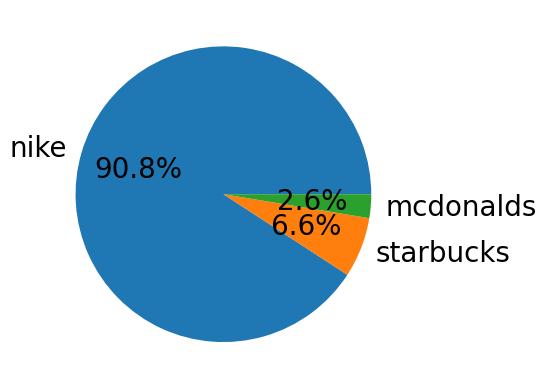

In [29]:
author_brand.max_type.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':20})
plt.ylabel(None)
plt.show()